<a href="https://colab.research.google.com/github/Tuevu110405/Module5_1st_step_toDL/blob/feature%2Flogistic_regression/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown 1SFWQ7Zi83Gff-RVrlHj0z4Llm1Nq4BBA


Downloading...
From: https://drive.google.com/uc?id=1SFWQ7Zi83Gff-RVrlHj0z4Llm1Nq4BBA
To: /content/titanic_modified_dataset.csv
100% 25.9k/25.9k [00:00<00:00, 2.95MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
dataset_path = 'titanic_modified_dataset.csv'
df = pd.read_csv(dataset_path, index_col='PassengerId')


In [ ]:
dataset_arr = df.to_numpy().astype(np.float64)
X, y = dataset_arr[:, :-1], dataset_arr[:, -1]

In [ ]:
intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)


In [ ]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(X_b, y, test_size=val_size, shuffle=is_shuffle, random_state=random_state)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=test_size, shuffle=is_shuffle, random_state=random_state)

In [ ]:
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

In [1]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [2]:
def predict(X, theta):
    dot_product = np.dot(X, theta)
    return sigmoid(dot_product)

In [3]:
def compute_loss(y_hat, y):
    y_hat = np.clip(y_hat, 1e-7, 1-1e-7)
    return (
        -y *  np.log(y_hat) - (1-y) * np.log(1-y_hat)
    ).mean()

In [4]:
def compute_gradient(X, y_hat, y):
    return np.dot(X.T, (y_hat - y)) / X.shape[0]

In [5]:
def update_theta(theta, gradient, learning_rate):
    return theta - learning_rate * gradient

In [6]:
def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta).round()
    acc = (y_hat == y).mean()

    return acc

In [ ]:
lr = 0.01
epochs = 100
batch_size = 16

np.random.seed(random_state)
theta = np.random.uniform(
    size= X_train.shape[1]
)

In [ ]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]

        y_hat = predict(X_batch, theta)

        train_loss = compute_loss(y_hat, y_batch)

        gradient = compute_gradient(X_batch, y_hat, y_batch)

        theta = update_theta(theta, gradient, lr)


        train_batch_losses.append(train_loss)
        train_acc = compute_accuracy(X_batch, y_batch, theta)
        train_batch_accs.append(train_acc)

        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)

        val_acc = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_acc)


    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)

    print(f'\nEPOCH { epoch + 1}:\tTraining loss : { train_batch_loss :.3f}\tValidation loss:{val_batch_loss:.3f}')




EPOCH 1:	Training loss : 0.703	Validation loss:0.599

EPOCH 2:	Training loss : 0.670	Validation loss:0.582

EPOCH 3:	Training loss : 0.640	Validation loss:0.567

EPOCH 4:	Training loss : 0.614	Validation loss:0.555

EPOCH 5:	Training loss : 0.592	Validation loss:0.544

EPOCH 6:	Training loss : 0.572	Validation loss:0.535

EPOCH 7:	Training loss : 0.554	Validation loss:0.528

EPOCH 8:	Training loss : 0.539	Validation loss:0.522

EPOCH 9:	Training loss : 0.526	Validation loss:0.517

EPOCH 10:	Training loss : 0.514	Validation loss:0.513

EPOCH 11:	Training loss : 0.504	Validation loss:0.509

EPOCH 12:	Training loss : 0.495	Validation loss:0.507

EPOCH 13:	Training loss : 0.487	Validation loss:0.505

EPOCH 14:	Training loss : 0.480	Validation loss:0.503

EPOCH 15:	Training loss : 0.474	Validation loss:0.502

EPOCH 16:	Training loss : 0.468	Validation loss:0.501

EPOCH 17:	Training loss : 0.463	Validation loss:0.500

EPOCH 18:	Training loss : 0.459	Validation loss:0.500

EPOCH 19:	Training

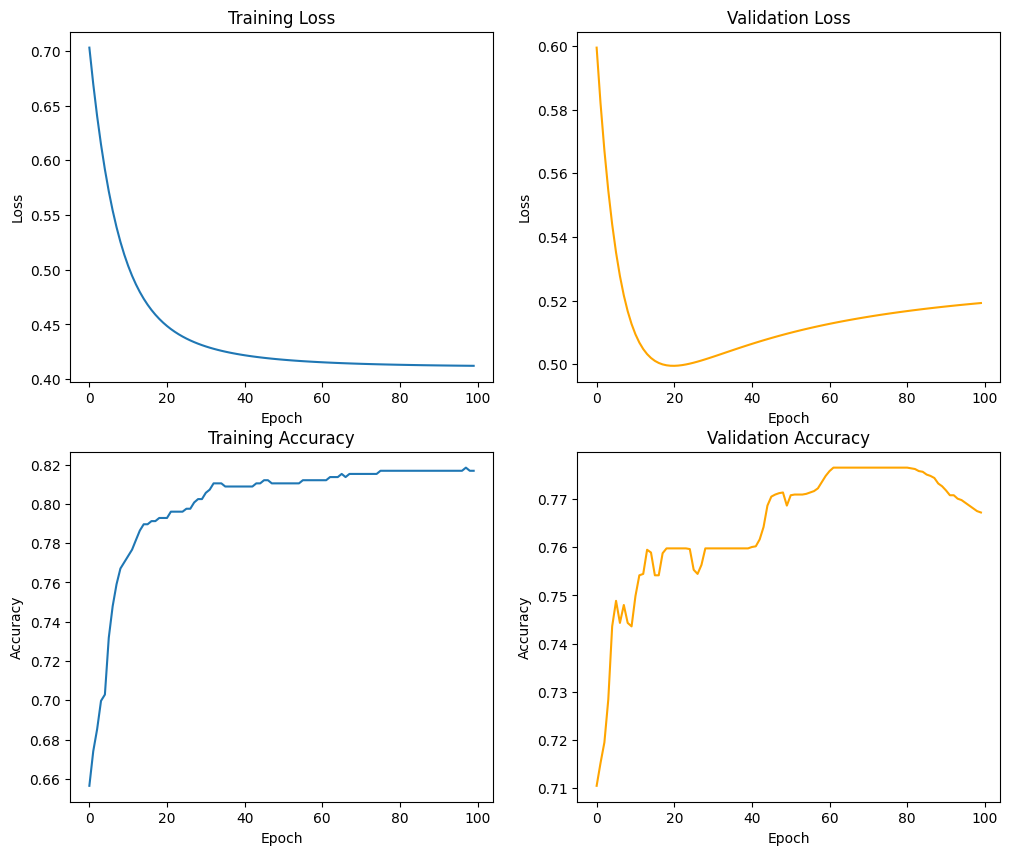

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel= 'Epoch', ylabel = 'Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel= 'Epoch', ylabel = 'Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel= 'Epoch', ylabel = 'Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accs, 'orange')
ax[1, 1].set(xlabel= 'Epoch', ylabel = 'Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()

In [ ]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)

print(f'Validation set accuracy: {val_set_acc:.3f}')
print(f'Test set accuracy: {test_set_acc:.3f}')

Validation set accuracy: 0.771
Test set accuracy: 0.775


Bài 2

In [ ]:
!gdown 1dANzxlEjeCEbveFOWWqzSG-niVx-vCgK

Downloading...
From: https://drive.google.com/uc?id=1dANzxlEjeCEbveFOWWqzSG-niVx-vCgK
To: /content/sentiment_analysis.csv
100% 1.10M/1.10M [00:00<00:00, 112MB/s]


In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from nltk.tokenize import TweetTokenizer
from collections import defaultdict

In [ ]:
dataset_path = 'sentiment_analysis.csv'
df = pd.read_csv(dataset_path, index_col='id')

In [ ]:
def text_normalize(text):
    #retweet old acronym "RT" removal
    text = re.sub(r'^RT[\s]+', '',text)
    #Hyperlink removal
    text = re.sub(r'https?:\/\/.*[\ r\n]* ', '', text)
    #Hashtags removal
    text = re.sub(r'#', '', text)
    #puctuation removal
    text = re.sub(r'[^\w\s]','',text)
    #Tokenization
    tokenizer = TweetTokenizer(preserve_case = False, strip_handles = True, reduce_len = True)
    text_tokens = tokenizer.tokenize(text)

    return text_tokens


In [ ]:
def get_freqs(df):
    freqs = defaultdict(lambda: 0)
    for idx, row in df.iterrows():
        tweet = row['tweet']
        label = row['label']

        tokens = text_normalize(tweet)
        for token in tokens:
            pair = (token, label)
            freqs[pair] += 1

    return freqs

In [ ]:
def get_feature(text, freqs):
    tokens = text_normalize(text)

    X = np.zeros(3)
    X[0] = 1

    for token in tokens:
        X[1] += freqs[(token, 0)]
        X[2] += freqs[(token, 1)]

    return X

In [ ]:
X = []
y = []

freqs = get_freqs(df)
for idx, row in df. iterrows():
    tweet = row['tweet']
    label = row['label']

    X_i = get_feature(tweet, freqs)
    X.append(X_i)
    y.append(label)

X = np.array(X)
y = np.array(y)

In [ ]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=val_size, shuffle=is_shuffle, random_state=random_state)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=test_size, shuffle=is_shuffle, random_state=random_state)

In [ ]:
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(y_hat, y):
    y_hat = np.clip(y_hat, 1e-7, 1-1e-7)

    return (
        -y *  np.log(y_hat) - (1-y) * np.log(1-y_hat)
    ).mean()

def predict(X, theta):
    dot_product = np.dot(X, theta)
    y_hat = sigmoid(dot_product)

    return y_hat

def compute_gradient(X, y_hat, y):
    return np.dot(X.T, (y_hat - y)) / X.shape[0]

def update_theta(theta, gradient, learning_rate):
    return theta - learning_rate * gradient

def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta).round()
    acc = (y_hat == y).mean()

    return acc

In [ ]:
lr = 0.01
epochs = 200
batch_size = 128

np.random.seed(random_state)
theta = np.random.uniform(
    size = X_train.shape[1]
)

In [ ]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]

        y_hat = predict(X_batch, theta)

        train_loss = compute_loss(y_hat, y_batch)

        gradient = compute_gradient(X_batch, y_hat, y_batch)

        theta = update_theta(theta, gradient, lr)


        train_batch_losses.append(train_loss)
        train_acc = compute_accuracy(X_batch, y_batch, theta)
        train_batch_accs.append(train_acc)

        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)

        val_acc = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_acc)


    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)

    print(f'\nEPOCH { epoch + 1}:\tTraining loss : { train_batch_loss :.3f}\tValidation loss:{val_batch_loss:.3f}')




EPOCH 1:	Training loss : 0.723	Validation loss:0.607

EPOCH 2:	Training loss : 0.718	Validation loss:0.605

EPOCH 3:	Training loss : 0.713	Validation loss:0.602

EPOCH 4:	Training loss : 0.708	Validation loss:0.600

EPOCH 5:	Training loss : 0.704	Validation loss:0.597

EPOCH 6:	Training loss : 0.699	Validation loss:0.595

EPOCH 7:	Training loss : 0.695	Validation loss:0.593

EPOCH 8:	Training loss : 0.690	Validation loss:0.590

EPOCH 9:	Training loss : 0.686	Validation loss:0.588

EPOCH 10:	Training loss : 0.682	Validation loss:0.586

EPOCH 11:	Training loss : 0.678	Validation loss:0.584

EPOCH 12:	Training loss : 0.673	Validation loss:0.582

EPOCH 13:	Training loss : 0.669	Validation loss:0.580

EPOCH 14:	Training loss : 0.665	Validation loss:0.578

EPOCH 15:	Training loss : 0.661	Validation loss:0.576

EPOCH 16:	Training loss : 0.658	Validation loss:0.574

EPOCH 17:	Training loss : 0.654	Validation loss:0.572

EPOCH 18:	Training loss : 0.650	Validation loss:0.570

EPOCH 19:	Training

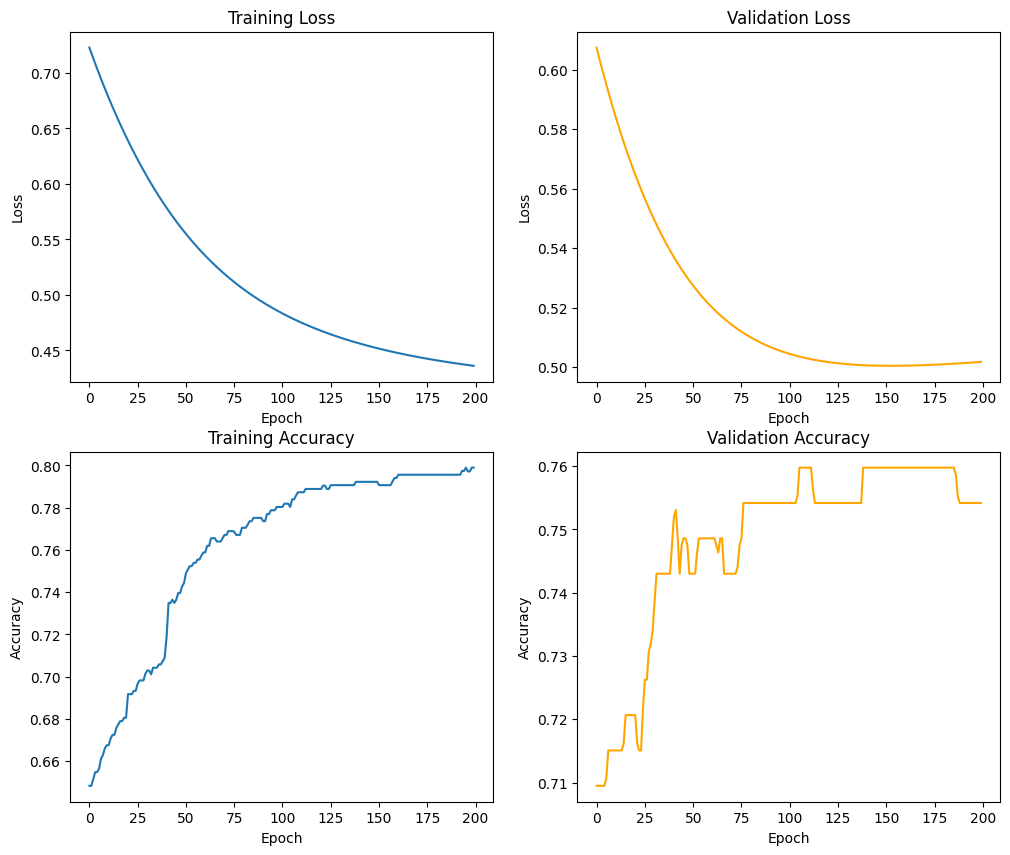

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel= 'Epoch', ylabel = 'Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel= 'Epoch', ylabel = 'Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel= 'Epoch', ylabel = 'Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accs, 'orange')
ax[1, 1].set(xlabel= 'Epoch', ylabel = 'Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()

In [ ]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)

print(f'Validation set accuracy: {val_set_acc:.3f}')
print(f'Test set accuracy: {test_set_acc:.3f}')

Validation set accuracy: 0.754
Test set accuracy: 0.753
